# PC3 - health data

cours [MAP 535](https://moodle.polytechnique.fr/course/view.php?id=14763): Regression de Karim Lounici

auteur de ce notebook python : Marc Lelarge

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from patsy import dmatrices

## 1. Load the data

The health dataset contains 4 variables: - “y” is a measure of health risk. - “age” - “tri” (triglycerides) - “chol” (cholesterol)

In [3]:
df = pd.read_csv('./health.txt', sep=" ",index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       25 non-null     float64
 1   age     25 non-null     float64
 2   tri     25 non-null     float64
 3   chol    25 non-null     float64
dtypes: float64(4)
memory usage: 1000.0 bytes


In [5]:
df

,y,age,tri,chol
Id,,,,
1,0.344166,61.371018,255.998604,174.725537
2,0.468648,70.009314,303.203193,191.830690
3,0.011416,20.090352,469.998113,126.269968
4,0.472875,71.242094,146.105958,211.434928
5,0.000000,20.089902,221.786232,240.876589
6,0.143997,43.235205,266.090679,137.168469
7,0.041410,25.842924,372.907817,227.054412
8,0.113812,41.469520,131.169532,131.447072
9,0.109292,35.788774,430.398655,213.031275


# 2. Do the correlation plot. 

Comment on any interesting patterns.

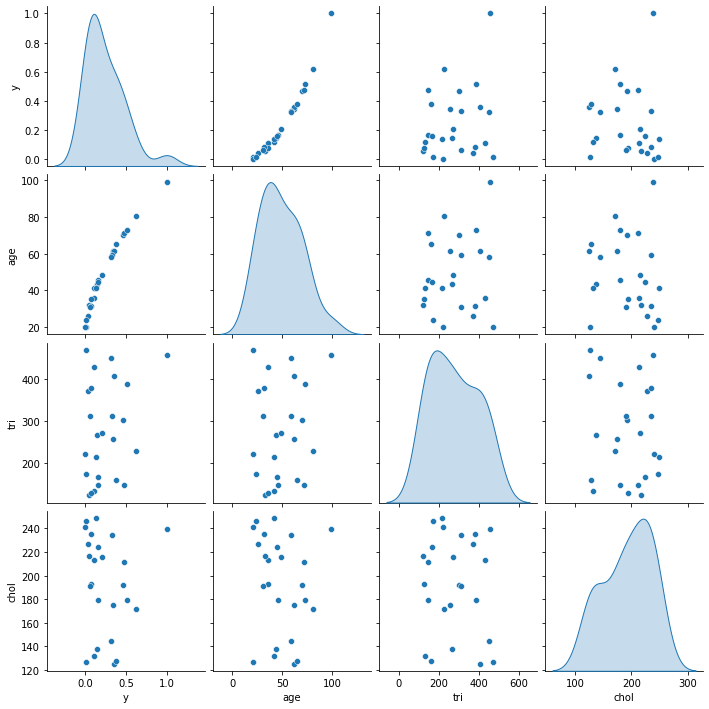

In [6]:
g = sns.pairplot(df,diag_kind='kde',corner=False)

In [7]:
correlations = np.corrcoef(df.T)
print(correlations)

[[ 1.          0.97137971  0.25466088 -0.06457626]
 [ 0.97137971  1.          0.14479489 -0.15394247]
 [ 0.25466088  0.14479489  1.         -0.10591038]
 [-0.06457626 -0.15394247 -0.10591038  1.        ]]


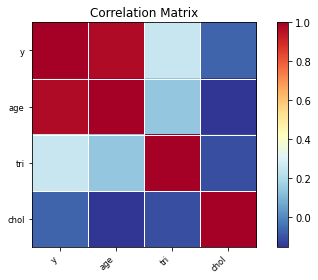

In [8]:
import statsmodels.graphics.api as smg
smg.plot_corr(correlations, xnames=df.columns)
plt.show()

**Answer :** y is strongly correlated with age but plotting y against age seems to reveals a nonlinear relation between these two variables. Relations between y and the other variables is not obvious

## 3.  Fit a linear model for “y” against the other covariates.

In [9]:
y,X = dmatrices('y ~ age + tri + chol ',data=df,return_type='dataframe')

In [10]:
mod = sm.OLS(y,X)
res = mod.fit()
infl = res.get_influence()
cooks =  infl.summary_frame()['cooks_d']

In [11]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     199.5
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.37e-15
Time:                        16:54:19   Log-Likelihood:                 43.350
No. Observations:                  25   AIC:                            -78.70
Df Residuals:                      21   BIC:                            -73.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4792      0.059     -8.121      0.0

## 4.  Plot the studentized residuals and Cook’s distances against each covariate. 

Do you notice anything problematic? In particular, look for any potential non-linear relationships and on any potential outliers and influential points.

(120.0, 255.0)

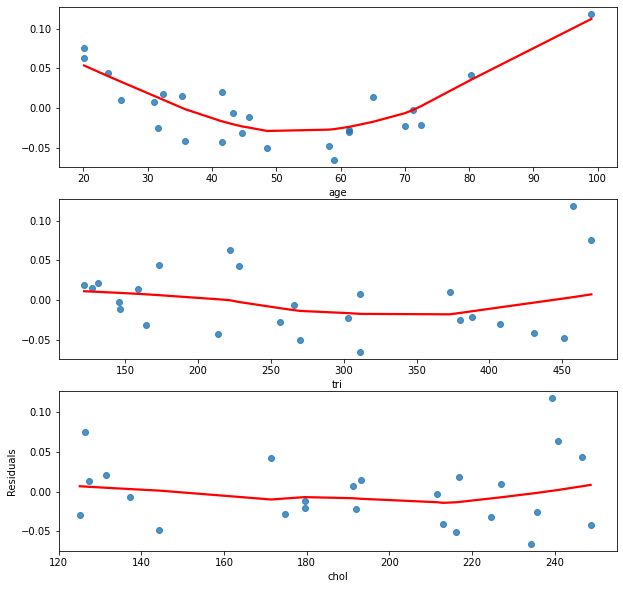

In [12]:
# plot residuals
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.regplot(x=X['age'],y=res.resid,lowess=True,ax=ax1,line_kws={'color':'red'})
plt.xlim(15, 100)


sns.regplot(x=X['tri'],y=res.resid,lowess=True,ax=ax2,line_kws={'color':'red'})
plt.xlim(100, 500)


sns.regplot(x=X['chol'],y=res.resid,lowess=True,ax=ax3,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlim(120, 255)

In [13]:
residuals = res.outlier_test()

(120.0, 255.0)

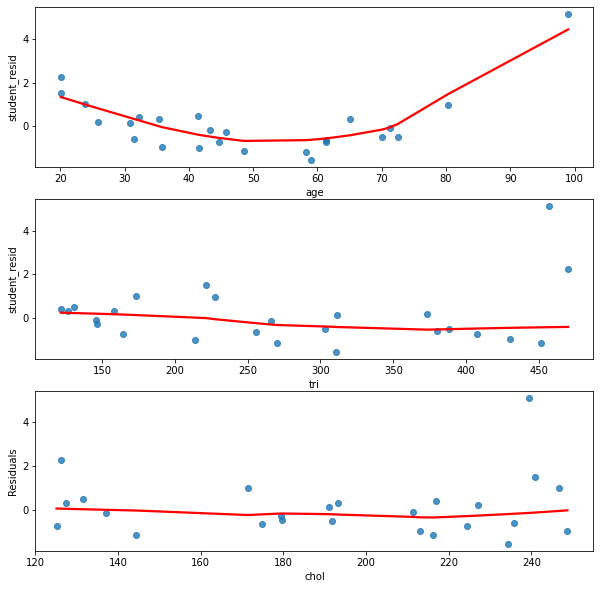

In [14]:
# plot studentized residuals
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.regplot(x=X['age'],y=residuals.student_resid,lowess=True,ax=ax1,line_kws={'color':'red'})
plt.xlim(15, 100)


sns.regplot(x=X['tri'],y=residuals.student_resid,lowess=True,ax=ax2,line_kws={'color':'red'})
plt.xlim(100, 500)


sns.regplot(x=X['chol'],y=residuals.student_resid,lowess=True,ax=ax3,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlim(120, 255)

(120.0, 255.0)

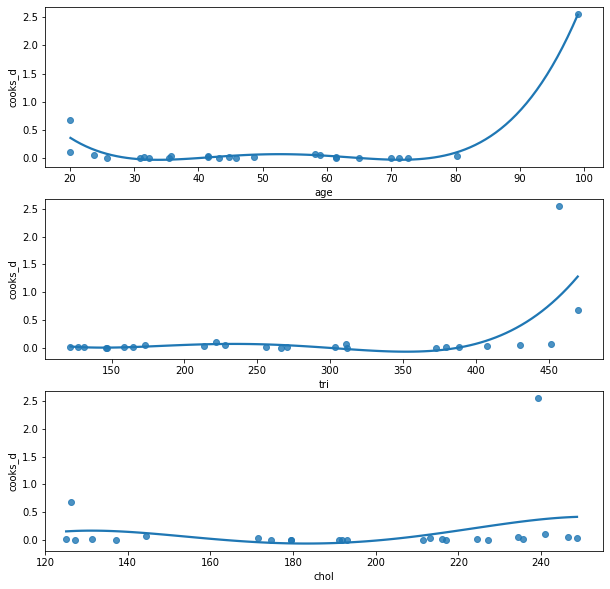

In [15]:
# plot Cook
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.regplot(x=X['age'],y=cooks,order=4,ax=ax1,ci=None)
plt.xlim(15, 100)

sns.regplot(x=X['tri'],y=cooks,order=4,ax=ax2,ci=None)
plt.xlim(100, 500)

sns.regplot(x=X['chol'],y=cooks,order=4,ax=ax3,ci=None)
plt.xlim(120, 255)

**Answer:** As we suspected earlier, the relation between age and y is not linear as revealed by the residuals against age plot. The other residuals plots do not reveal anything problematic. An investigation of the Cook distance plots reveals a problematic point consistenlty over all covariates.

In [16]:
np.where(cooks > 2)

(array([24]),)

## 5.  Try adding quadratic terms to obtain a better model (No need to add interaction terms). 

Repeat the diagnostics. Have some resolve some of the problems. Any new potential outliers and influential point?

In [17]:
y,X = dmatrices('y ~ age + tri + chol + I(age**2) + I(tri**2) + I(chol**2)',data=df,return_type='dataframe')

mod = sm.OLS(y,X)
res = mod.fit()
infl = res.get_influence()
cooks =  infl.summary_frame()['cooks_d']

In [18]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.980e+06
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.84e-53
Time:                        16:54:20   Log-Likelihood:                 173.65
No. Observations:                  25   AIC:                            -333.3
Df Residuals:                      18   BIC:                            -324.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0930      0.001    -66.938   

(120.0, 255.0)

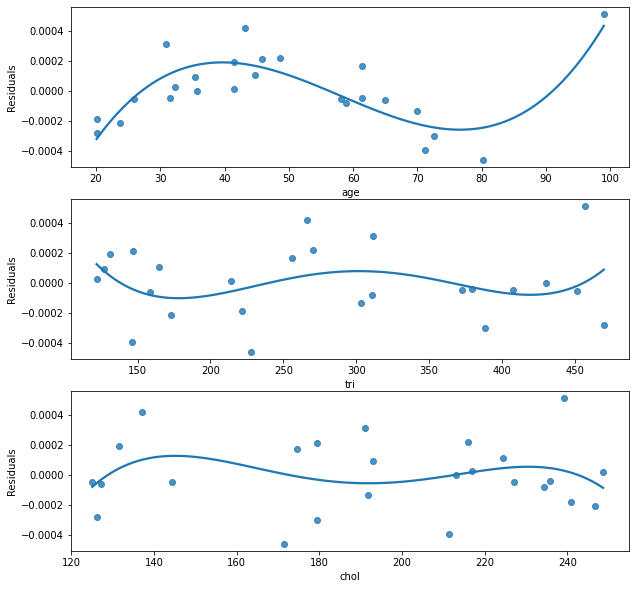

In [19]:
residuals = res.resid
residuals.name='Residuals'

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.regplot(x=X['age'],y=residuals,order=3,ax=ax1,ci=None)
plt.ylabel('Residuals')
plt.xlim(15, 100)

sns.regplot(x=X['tri'],y=residuals,order=4,ax=ax2,ci=None)
plt.ylabel('Residuals')
plt.xlim(100, 500)

sns.regplot(x=X['chol'],y=residuals,order=4,ax=ax3,ci=None)
plt.ylabel('Residuals')
plt.xlim(120, 255)

(120.0, 255.0)

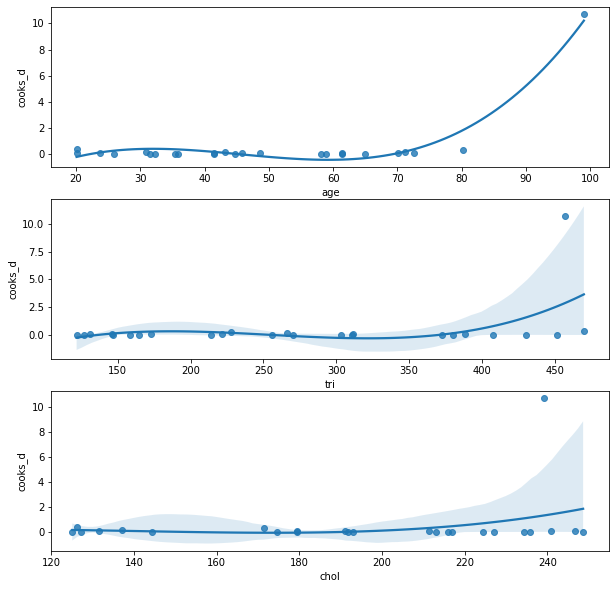

In [20]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.regplot(x=X['age'],y=cooks,order=3,ci=None,ax=ax1)
plt.xlim(15, 100)

sns.regplot(x=X['tri'],y=cooks,order=3,ax=ax2)
plt.xlim(90, 600)

sns.regplot(x=X['chol'],y=cooks,order=3,ax=ax3)
plt.xlim(120, 255)

**Answer:** The residuals plots are much better now (look at the y-scale as compared to the linear model). The outlier point is still here and its Cooks distance has increased.

In [21]:
np.where(cooks > 8)

(array([24]),)

The 24th observation is clearly an outlier. We remove it from the study

## 6.  Remove the problematic datapoints. 

Refit the quadratic model. Confirm that the residuals and influence diagnostics are improved. 
Summarize the fitted model and use the t-tests to determine how each covariate impacts “y”.

In [22]:
df = df.drop(25)

In [23]:
df

,y,age,tri,chol
Id,,,,
1,0.344166,61.371018,255.998604,174.725537
2,0.468648,70.009314,303.203193,191.830690
3,0.011416,20.090352,469.998113,126.269968
4,0.472875,71.242094,146.105958,211.434928
5,0.000000,20.089902,221.786232,240.876589
6,0.143997,43.235205,266.090679,137.168469
7,0.041410,25.842924,372.907817,227.054412
8,0.113812,41.469520,131.169532,131.447072
9,0.109292,35.788774,430.398655,213.031275


In [24]:
y,X = dmatrices('y ~ age + tri + chol + I(age**2) + I(tri**2) + I(chol**2)',data=df,return_type='dataframe')

mod = sm.OLS(y,X)
res = mod.fit()
infl = res.get_influence()
cooks =  infl.summary_frame()['cooks_d']

(120.0, 255.0)

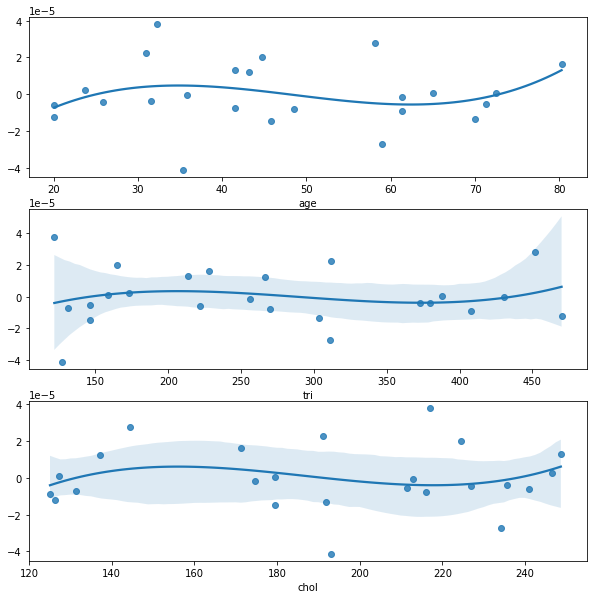

In [25]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.regplot(x=X['age'],y=res.resid,order=3,ax=ax1,ci=None)
plt.xlim(15, 100)

sns.regplot(x=X['tri'],y=res.resid,order=3,ax=ax2)
plt.xlim(100, 500)

sns.regplot(x=X['chol'],y=res.resid,order=3,ax=ax3)
plt.xlim(120, 255)

(120.0, 255.0)

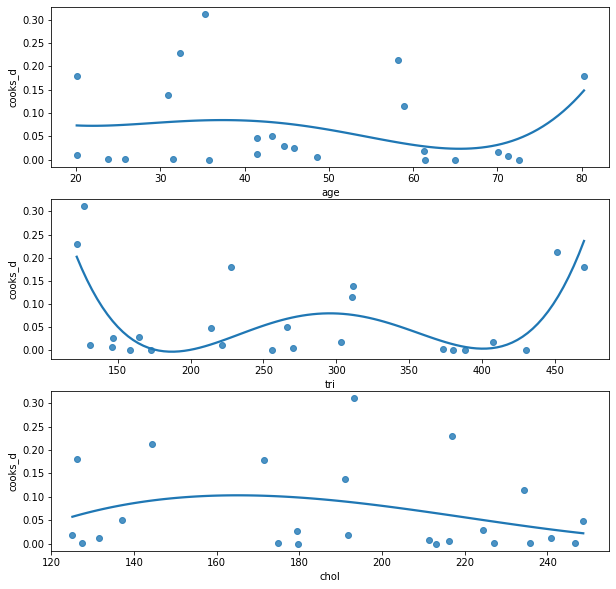

In [26]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
sns.regplot(x=X['age'],y=cooks,order=4,ci=None,ax=ax1)
plt.xlim(15, 100)

sns.regplot(x=X['tri'],y=cooks,order=4,ax=ax2,ci=None)
plt.xlim(90, 600)

sns.regplot(x=X['chol'],y=cooks,order=3,ax=ax3,ci=None)
plt.xlim(120, 255)

**Answer:** Diagnostic plots do not reveal any problem. We accept this model.

In [27]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.051e+08
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           2.66e-67
Time:                        16:54:22   Log-Likelihood:                 229.40
No. Observations:                  24   AIC:                            -444.8
Df Residuals:                      17   BIC:                            -436.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0953      0.000   -862.414   